In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS


%matplotlib inline
import matplotlib.pyplot as plt

#from IPython.display import Image
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.show()

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [ ]:
import sys, os
from deepiu.util.text_predictor import TextPredictor
from deepiu.util.sim_predictor import SimPredictor
from deepiu.util import text2ids
import melt, gezi
import numpy as np 
import traceback

try:
  import conf
  from conf import TEXT_MAX_WORDS
except Exception:
  from deepiu.image_caption.conf import TEXT_MAX_WORDS

image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'

image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_v4.ckpt'

#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.baseline'
#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil/epoch/model.ckpt-30.00-24600'
model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil2.inceptionV4/'
vocab_path = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt'
valid_dir = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/valid'


image_model_name = melt.get_imagenet_from_checkpoint(image_model_checkpoint_path).name
image_model = None
if not melt.varname_in_checkpoint(image_model_name, model_dir):
  image_model = melt.image.ImageModel(image_model_checkpoint_path, 
                                      feature_name='attention')
  
    
print('image_model:', image_model)

text2ids.init(vocab_path)
vocab = text2ids.vocab

predictor = SimPredictor(model_dir,  
                         image_model=image_model,
                         index=-1)

text_strs = np.load(os.path.join(valid_dir, 'distinct_text_strs.npy'))
img2text = np.load(os.path.join(valid_dir, 'img2text.npy')).item()

tensorflow_version: 1.4.0


INFO:tensorflow:Scale of 0 disables regularizer.


checkpoint /home/gezi/data/image_model_check_point/inception_v4.ckpt model_name InceptionV4 height 299 width 299
build graph for final one feature
preprocessing_fn net_name inception_v4 height 299 width 299


INFO:tensorflow:Scale of 0 disables regularizer.


image_feature: Tensor("Flatten/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
build graph for attention features
preprocessing_fn net_name inception_v4 height 299 width 299
image_feature: Tensor("Flatten_1/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
in create_image_model_init_fn image_model_name InceptionV4 moving_average_decay None


INFO:tensorflow:Restoring parameters from /home/gezi/data/image_model_check_point/inception_v4.ckpt
image_model: <melt.image.image_model.ImageModel object at 0x7fd7c3e67410>
INFO:tensorflow:Initializing vocabulary from file: /home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt


restore image var from InceptionV4 /home/gezi/data/image_model_check_point/inception_v4.ckpt duration: 4.72671985626


INFO:tensorflow:Created vocabulary with 10148 words


ENCODE_UNK 1
load frozen graph from /home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil2.inceptionV4/model.ckpt-11.95-49000.pb with mapfile /home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil2.inceptionV4/model.ckpt-11.95-49000.map duration: 1.04923892021


image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 0d5bb5c1fcebec433bdd5a636c85e907d0d40535


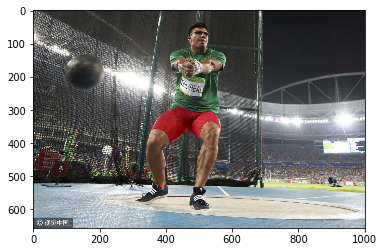

topwords of image:
0 锻炼 0.785113|1 跑道 0.778894|2 赛跑 0.75781|3 倒立 0.744815|4 单脚 0.743798|5 赛道 0.742311|6 运动 0.741942|7 锻炼身体 0.741298|8 比武 0.721923|9 练习 0.720617|10 杂技 0.716238|11 练舞 0.715742|12 接力棒 0.709903|13 场地 0.700466|14 操场上 0.687098|15 广场 0.685325|16 擂台 0.682299|17 练武 0.678517|18 假肢 0.675026|19 单腿 0.670134|20 练功 0.667692|21 杠 0.662936|22 跑步 0.659858|23 塑胶跑道 0.659387|24 体育器材 0.659223|25 弓着步 0.658782|26 竞走比赛 0.648126|27 跳跃 0.64787|28 马路上 0.64666|29 摔跤 0.645644|30 动作 0.644567|31 跳 0.641418|32 向上 0.639028|33 拳击台 0.638313|34 武术 0.637798|35 踢腿 0.636376|36 打拳 0.635821|37 马路 0.635742|38 甩 0.635172|39 弓步 0.634404|40 训练 0.634353|41 链球 0.63391|42 踢毽子 0.631529|43 耍 0.631097|44 单脚站立 0.629686|45 抬臂 0.628976|46 健壮 0.628072|47 练 0.627078|48 拳击场 0.626598|49 花式溜冰 0.626545|50 拳套 0.62058|51 蹦蹦 0.619401|52 竞走 0.619134|53 拳站 0.617902|54 赛场 0.61769|55 街边 0.616849|56 攀 0.61541|57 陪练 0.61445|58 蹦床 0.61252|59 右脚 0.612349|60 平衡 0.612023|61 切磋 0.611564|62 捡球 0.610099|63 马路边 0.609653|64 公路 0.608521|65 冲线 0.607

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.818 seconds.
Prefix dict has been built succesfully.


<UNK>
sim: [ 0.08975016]
text(q for exit): 
image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 0aa9bd2851ea3cb45d99247ae9d9e7185036474c


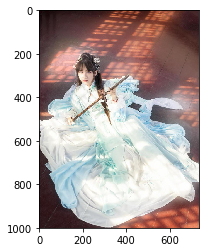

topwords of image:
0 剑 0.662437|1 翅膀 0.613362|2 左手腕 0.605387|3 女士 0.600483|4 碟 0.595757|5 棒子 0.595555|6 竹简 0.593968|7 捆绑 0.593133|8 女人 0.593082|9 嘴唇 0.585778|10 发卡 0.577078|11 二胡 0.576287|12 武器 0.572716|13 一把 0.561563|14 袍 0.560859|15 拉力 0.559671|16 拳站 0.548412|17 烟花 0.546015|18 毯子 0.535724|19 拉琴 0.534463|20 会场 0.534038|21 耳环 0.530216|22 长棍 0.529687|23 乒乓球室 0.528943|24 落地窗 0.527665|25 凝视 0.526607|26 饰品 0.525885|27 刀 0.522332|28 首 0.521151|29 地靠 0.520071|30 火焰 0.516842|31 幽暗 0.516282|32 孕妇 0.516058|33 嫩 0.515167|34 兵器 0.51089|35 昏暗 0.508672|36 小提琴 0.506969|37 长发女 0.505496|38 耳麦 0.503701|39 棍子 0.501191|40 红花 0.501091|41 广播 0.50083|42 衬 0.500437|43 发簪 0.49972|44 两排 0.498652|45 嘟嘴 0.498444|46 失火 0.497318|47 活 0.496862|48 逗弄 0.496382|49 公厕 0.493784|50 假模 0.49187|51 调色盘 0.491436|52 项链 0.491133|53 蹦蹦 0.491013|54 夜晚 0.489224|55 新 0.489175|56 挺 0.488217|57 女 0.486156|58 斧头 0.486004|59 酒店 0.485747|60 一束花 0.485247|61 姜 0.485175|62 玉 0.484192|63 编 0.482238|64 耳坠 0.48179|65 花环 0.481578|66 大鼓 0.4813

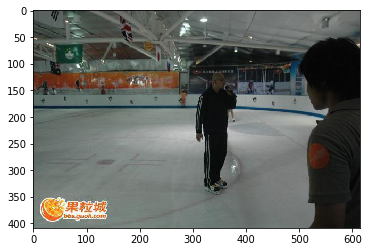

topwords of image:
0 嘟嘴 0.671496|1 过 0.633266|2 我 0.597992|3 不一 0.594843|4 红花 0.589013|5 残 0.588536|6 独轮车 0.581018|7 失火 0.577685|8 人群 0.571824|9 停机场 0.567456|10 蹦蹦 0.563239|11 射箭场 0.562828|12 宴会 0.559588|13 戒尺 0.558356|14 拳站 0.556901|15 五位 0.556387|16 爆 0.554534|17 右侧 0.553877|18 弹跳 0.548736|19 学生服 0.547213|20 劲 0.542269|21 公厕 0.541554|22 附近 0.541322|23 解剖 0.539511|24 大厅 0.539412|25 翅膀 0.536933|26 比赞 0.534387|27 虫子 0.530536|28 拥吻 0.530354|29 保龄球 0.527925|30 广播 0.527801|31 候车厅 0.523658|32 棚 0.522184|33 旗 0.520618|34 遮阳棚 0.520333|35 鼓励 0.519719|36 侧面 0.516081|37 滑旱冰 0.513093|38 上撞线 0.512917|39 车库里 0.512191|40 稀少 0.511546|41 布景 0.511521|42 踏板 0.509841|43 学生上课 0.509205|44 卫生 0.509112|45 群人 0.508092|46 射击场 0.506284|47 森 0.506254|48 安抚 0.505336|49 双人舞 0.503726|50 万 0.502781|51 挡板 0.502179|52 运服 0.501783|53 有人 0.501622|54 合在一起 0.501157|55 头靠头 0.501133|56 右小腿 0.500447|57 翻跟头 0.5001|58 碟 0.500028|59 长裤 0.496856|60 扫描器 0.496382|61 里练舞 0.494985|62 棒 0.494947|63 会场 0.493863|64 宽敞 0.49323|65 捆绑 0.4

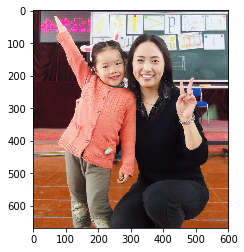

topwords of image:
0 女孩 0.790392|1 腿 0.7877|2 搭 0.774489|3 坐 0.770517|4 男孩 0.769321|5 小女孩 0.768723|6 肩膀 0.763541|7 鞋带 0.760521|8 脚趾甲 0.751743|9 椅子 0.74697|10 大理石 0.742876|11 长凳 0.739546|12 孩子 0.738752|13 旁坐 0.73834|14 小孩 0.733976|15 小男孩 0.732081|16 沙发 0.731105|17 坐在 0.728232|18 凳子 0.728211|19 小孩子 0.724214|20 发箍 0.720906|21 沙发椅 0.717393|22 搂 0.715602|23 按摩椅 0.710587|24 棕 0.709207|25 发卡 0.705815|26 肩上 0.705634|27 座椅 0.704996|28 女孩子 0.701824|29 亲 0.701677|30 一个男孩 0.694448|31 啤酒罐 0.692982|32 睡觉 0.692047|33 长椅 0.691433|34 炕 0.687337|35 盘坐在 0.681561|36 小朋友 0.678657|37 眼泪 0.677667|38 面带笑容 0.675142|39 男女 0.672662|40 椅背 0.670454|41 脱裤子 0.669583|42 笑容 0.669183|43 手表 0.664924|44 躺椅 0.664464|45 可爱 0.661472|46 胳膊 0.659811|47 女生 0.658208|48 扇扇子 0.657428|49 肚子 0.655154|50 休息 0.652845|51 面带微笑 0.65149|52 猜 0.646805|53 项链 0.642693|54 板凳 0.639616|55 粉色 0.634136|56 凳上 0.630766|57 背靠 0.630591|58 肩 0.628208|59 心 0.625496|60 修指甲 0.62113|61 穿鞋 0.615246|62 吸氧 0.60928|63 比划 0.606272|64 相握 0.605606|65 大笑 0.60491

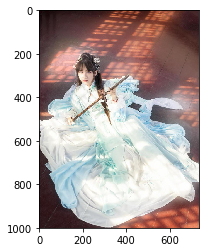

topwords of image:
0 剑 0.662437|1 翅膀 0.613362|2 左手腕 0.605387|3 女士 0.600483|4 碟 0.595757|5 棒子 0.595555|6 竹简 0.593968|7 捆绑 0.593133|8 女人 0.593082|9 嘴唇 0.585778|10 发卡 0.577078|11 二胡 0.576287|12 武器 0.572716|13 一把 0.561563|14 袍 0.560859|15 拉力 0.559671|16 拳站 0.548412|17 烟花 0.546015|18 毯子 0.535724|19 拉琴 0.534463|20 会场 0.534038|21 耳环 0.530216|22 长棍 0.529687|23 乒乓球室 0.528943|24 落地窗 0.527665|25 凝视 0.526607|26 饰品 0.525885|27 刀 0.522332|28 首 0.521151|29 地靠 0.520071|30 火焰 0.516842|31 幽暗 0.516282|32 孕妇 0.516058|33 嫩 0.515167|34 兵器 0.51089|35 昏暗 0.508672|36 小提琴 0.506969|37 长发女 0.505496|38 耳麦 0.503701|39 棍子 0.501191|40 红花 0.501091|41 广播 0.50083|42 衬 0.500437|43 发簪 0.49972|44 两排 0.498652|45 嘟嘴 0.498444|46 失火 0.497318|47 活 0.496862|48 逗弄 0.496382|49 公厕 0.493784|50 假模 0.49187|51 调色盘 0.491436|52 项链 0.491133|53 蹦蹦 0.491013|54 夜晚 0.489224|55 新 0.489175|56 挺 0.488217|57 女 0.486156|58 斧头 0.486004|59 酒店 0.485747|60 一束花 0.485247|61 姜 0.485175|62 玉 0.484192|63 编 0.482238|64 耳坠 0.48179|65 花环 0.481578|66 大鼓 0.4813

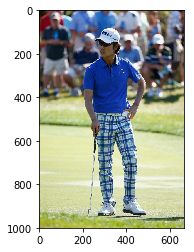

topwords of image:
0 高尔夫球场 0.8647|1 草坪 0.841761|2 球杆 0.806255|3 草地 0.789447|4 高尔夫球 0.786936|5 杆 0.775829|6 打高尔夫 0.756136|7 脱手 0.744114|8 一碧千里 0.728335|9 包袋 0.713938|10 抛球 0.712236|11 中指 0.710052|12 球包 0.687683|13 球桶 0.687013|14 球棒 0.68536|15 戟 0.683208|16 旗杆 0.678606|17 棒球 0.669683|18 板球 0.666643|19 呼喊 0.665234|20 框旁 0.664575|21 草场 0.660693|22 上颠 0.654719|23 袋旁 0.650296|24 挥杆 0.643241|25 拿杆 0.639708|26 前单 0.638085|27 棒球场 0.63568|28 抛 0.635626|29 斑白 0.634179|30 标杆 0.630012|31 运服 0.626785|32 杆上 0.624475|33 盲杖 0.623496|34 上撞线 0.617479|35 球袋 0.613498|36 滑草 0.610093|37 绿茵茵 0.608707|38 郁郁葱葱 0.604603|39 杆袋 0.603942|40 庄稼地 0.596995|41 包前 0.596349|42 曲棍球 0.596312|43 长袜 0.596236|44 皮筋 0.595224|45 操场上 0.59491|46 右侧 0.591508|47 撑杆 0.588327|48 热身运动 0.586631|49 脚下 0.586366|50 挥打 0.585333|51 十二号 0.584841|52 碧绿 0.584673|53 球场 0.583654|54 翻跟头 0.581991|55 巧粉 0.580954|56 红丝 0.580609|57 草杆 0.579654|58 发球 0.578865|59 恤 0.577052|60 26 0.576142|61 绿油油 0.574845|62 击拳 0.572297|63 中年妇女 0.569969|64 连天 0.568312|6

In [ ]:
while True:
  image_name = raw_input('image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: ')
  image_name = image_name.strip().replace('file://', '')
  if image_name == 'q':
    break
  if not image_name.endswith('.jpg'):
    image_name += '.jpg'

  image_path = os.path.join(image_dir, image_name)

  if not os.path.exists(image_path):
    print('path not exists:%s'%image_path)
    image_path = image_name
    if not os.path.exists(image_path):
      continue
        
  plt.subplot(1, 1, 1)
  image_show(image_path)

#   try:
#     hits = img2text[image_name]
#     texts = [text_strs[hit] for hit in hits]
#     for text in texts:
#       word_ids = text2ids.text2ids(text)
#       seg_text = text2ids.ids2text(word_ids, print_end=False)
#       print('label:', text, seg_text)
#       words_importance = predictor.words_importance([word_ids])
#       words_importance = words_importance[0]
#       for i in range(len(word_ids)):
#         if word_ids[i] == 0:
#           break 
#       print()
#   except Exception:
#     print(traceback.format_exc(), file=sys.stderr)    
#     pass

  image = melt.read_image(image_path)
  scores, word_ids = predictor.top_words([image], 200)
  scores = scores[0]
  word_ids = word_ids[0]
  print('topwords of image:')
  i = 0
  for word_id, score in zip(word_ids, scores):
    print(i, vocab.key(int(word_id)), score, end='|')
    i += 1

  while True:
    text = raw_input('text(q for exit): ')
    if text is 'q' or not text.strip():
      break
    text = text.replace(' ', '')
    print(text2ids.text2segtext(text))
    print('sim:', predictor.predict([image], [text2ids.text2ids(text)]))